**Refered from Langchain Documentation:**

Tools are interfaces that an LLM can use to interact with an LLM can use to interact with external data/information. Eg. : Wkipedia Query, Functions defined by us. 

2 ways of using tools:

a) Chains : Through chains, we predefine the sequence of tool usage. This is preferably used when the sequence of operations is pre-defined and we only need to use a tool a fixed number of times. 

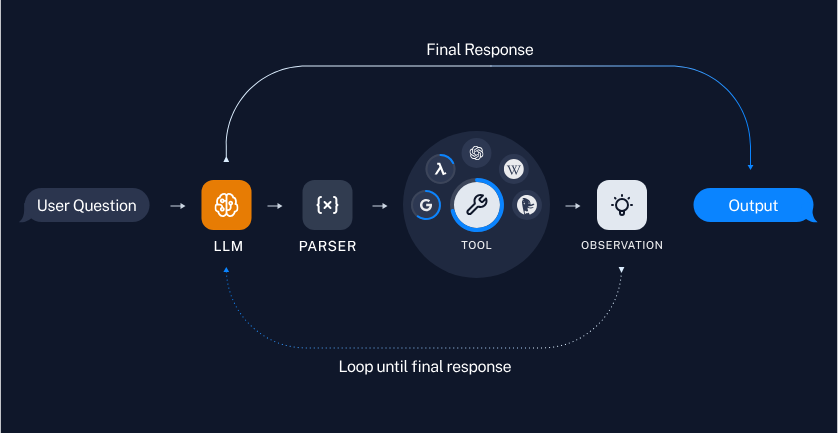


b) Agents : Agents let models decide the tool to be use as per the requirement. This is used when the number of times we use tools depends on the input. Therefore, we let the model itself decide how many times to use tools and in what order.

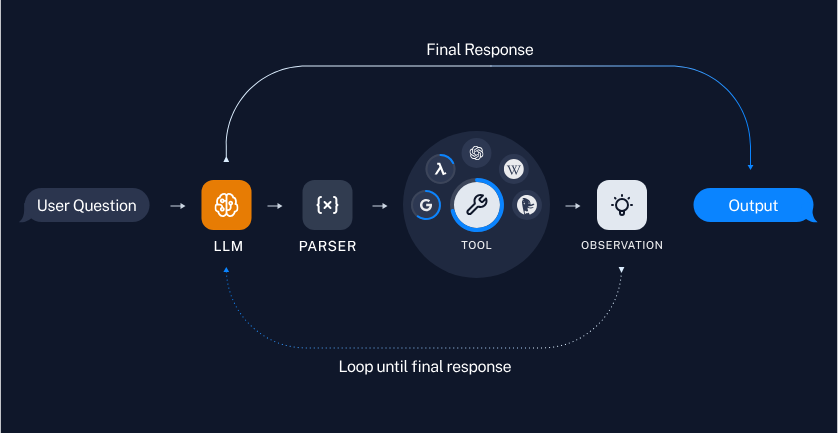

Creating a custom tool

In [6]:
from langchain_core.tools import tool

@tool
def multiply(first_int: int, second_int: int) -> int:
    """Multiply two integers together."""
    return first_int * second_int

In [2]:
print(multiply.name)
print(multiply.description)
print(multiply.args)

multiply
multiply(first_int: int, second_int: int) -> int - Multiply two integers together.
{'first_int': {'title': 'First Int', 'type': 'integer'}, 'second_int': {'title': 'Second Int', 'type': 'integer'}}


In [3]:
# Directly invoking tool without using any LLM
multiply.invoke({"first_int": 4, "second_int": 5})

20

**Creating a chain with single tool invoking**

Tool/function calling only works with models that explicitly support tool calling. We can continue using groq because it supports tool calling. 
Reference : https://python.langchain.com/v0.1/docs/integrations/chat/

In [4]:
from langchain_groq import ChatGroq
ChatModel = ChatGroq(temperature=1, model_name="mixtral-8x7b-32768",groq_api_key="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")

In [37]:
msg = ChatModel.invoke("whats five times forty two. ")
print(msg.content)

Five times forty two is equal to 210. This is calculated by multiplying 5 by 42. You can also calculate this by adding together 42 plus 42 (which is 84) four times, since 5 times 42 is the same as 4 twos times 42.


In [38]:
# Providing the tool to the LLM
llm_with_tools = ChatModel.bind_tools([multiply])

In [39]:
msg = llm_with_tools.invoke("whats five times forty two. ")
print(msg.content) 
    

Five times forty two is two hundred and ten.


**Creating a agent with multiple tools invoking**

In [2]:
from langchain.agents import AgentExecutor, create_tool_calling_agent

In [13]:
from langchain import hub
prompt = hub.pull("hwchase17/openai-tools-agent")
prompt.pretty_print()

================================ System Message ================================

You are a helpful assistant

============================= Messages Placeholder =============================

{chat_history}

================================ Human Message =================================

{input}

============================= Messages Placeholder =============================

{agent_scratchpad}


In [10]:
@tool
def add(first_int: int, second_int: int) -> int:
    "Add two integers."
    return first_int + second_int

@tool
def exponentiate(base: int, exponent: int) -> int:
    "Exponentiate the base to the exponent power."
    return base**exponent

tools = [multiply, add, exponentiate]

In [15]:
# Construct the tool calling agent
agent = create_tool_calling_agent(ChatModel, tools,prompt)

In [17]:
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [18]:
agent_executor.invoke({"input": "Take 3 to the fifth power and multiply that by the sum of twelve and three, then square the whole result"})



> Entering new AgentExecutor chain...

Invoking: `exponentiate` with `{'base': 3, 'exponent': 5}`


243
Invoking: `add` with `{'first_int': 12, 'second_int': 3}`


15
Invoking: `multiply` with `{'first_int': 243, 'second_int': 15}`


3645
Invoking: `exponentiate` with `{'base': 3645, 'exponent': 2}`


13286025The final answer is: 13286025. This is the result of taking 3 to the fifth power and multiplying that by the sum of twelve and three, then squaring the whole result.

> Finished chain.


{'input': 'Take 3 to the fifth power and multiply that by the sum of twelve and three, then square the whole result',
 'output': 'The final answer is: 13286025. This is the result of taking 3 to the fifth power and multiplying that by the sum of twelve and three, then squaring the whole result.'}